# Getting started with Glyco

This is a guide for how to get started with `glyco`.
In this notebook you will go through:
* How to read a glucose CSV file.
* How to plot simple summaries of glucose data.


To start make sure glyco is installed with the following command:

In [ ]:
!pip install glyco

And then import `glyco` and call it `gl` for the rest of this notebook. 
This is just to make it easier to use.

In [6]:
import glyco as gl

# How to read a glucose CSV file
You can use the method `read_csv` to read a glucose CSV file.
Requirements on the file:
* The file MUST contain *at least*:
  * **a timestamp column**, by default this name is set to *Device Timestamp*. The name of the column can be passed to read_csv as an argument `timestamp_col`.
  * **a glucose column** this column MUST contain glucose in the currently handled [units which you can view in the documentation here](./docs/units.md), by default the column name is set to *Historic Glucose mmol/* the name of the column can be passed to read_csv as an argument `glucose_col`. 

We are going to read the CSV file under `examples/data/sample_glucose.csv`

In [8]:
file_path = 'data/out_glucose_sample.csv'
glucose = gl.read_csv(file_path)

# display the first two rows
glucose.head(2)

,Device,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),Carbohydrates (servings),...,shifted_weekday_number,shifted_weekday_name,shifted_is_weekend,glucose,dg,dt,dg_dt,auc_mean,auc_lim,auc_min
idx,,,,,,,,,,,,,,,,,,,,,
2022-10-16 22:49:00,FreeStyle LibreLink,16-10-2022 22:49,0,6.339514,NaN,NaN,NaN,NaN,NaN,NaN,...,6,Sun,True,6.134984,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-16 23:04:00,FreeStyle LibreLink,16-10-2022 23:04,0,7.102766,NaN,NaN,NaN,NaN,NaN,NaN,...,6,Sun,True,6.622583,0.487599,900.0,0.000542,1097.310799,560.324824,3114.354607


In the case where there are extra rows, you can add the argument `skiprows`.
For example:

```Python
gl.read_csv(file_path, skiprows=1)
```

More [documentation on reading glucose files can be found in here](glucose.md).

Note that these sample files follow the export format that FreeStyle Libre uses. In case your CSV file contains different units or time formats from the default that glyco provides, you can pass these on to the read_csv method.

* **For a different glucose unit:** The default unit is **mmol/L** if your column has a different unit you should pass it as a *glucose_unit* argument. You can see a list of the handled [units in the documentation here](./docs/units.md)
* **For a different timestamp format:** Glyco uses the time format `"%d-%m-%Y %H:%M"` (Day-Month-Year Hour:Minute such as `31-01-2022 09:30`) if you want to use a different format, you must pass it to the `read_csv` method in the `timestamp_fmt` argument.



In [9]:
# check the first index in the glucose dataframe
glucose.index[0]

Timestamp('2022-10-16 22:49:00')

Here's an example where we use all of the above inputs:

In [10]:
# Example with all the above
from glyco.utils import Units

glucose = gl.read_csv(file_path, 
                    skiprows=0, 
                    timestamp_col= "Device Timestamp", 
                    glucose_col= "Historic Glucose mmol/L", 
                    glucose_unit=Units.mmolL.value, 
                    timestamp_fmt="%d-%m-%Y %H:%M"
                )

# display the first two glucose rows
glucose.head(2)

,Device,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),Carbohydrates (servings),...,shifted_weekday_number,shifted_weekday_name,shifted_is_weekend,glucose,dg,dt,dg_dt,auc_mean,auc_lim,auc_min
idx,,,,,,,,,,,,,,,,,,,,,
2022-10-16 22:49:00,FreeStyle LibreLink,16-10-2022 22:49,0,6.339514,NaN,NaN,NaN,NaN,NaN,NaN,...,6,Sun,True,6.134984,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-16 23:04:00,FreeStyle LibreLink,16-10-2022 23:04,0,7.102766,NaN,NaN,NaN,NaN,NaN,NaN,...,6,Sun,True,6.622583,0.487599,900.0,0.000542,1097.310799,560.324824,3114.354607


**Note on the Glucose Dataframe**
The glucose dataframe contains multiple columns that are automatically generated by glyco.
These include: the timestamp, glucose, time and date columns (including the day, hour, week number etc.), and other values used for calculating metrics. You can read more in the  [./docs/concepts/glucose.md](./docs/concepts/glucose.md).

For the purpose of this tutorial we will only look at:
* `t` : the timestamp column (same as the index).
* `G` : The glucose value in `mmol/L`. Regardless of the input file unit `G` will always be in `mmol/L`.

In [11]:
# TODO reorder?
glucose.columns

Index(['Device', 'Device Timestamp', 'Record Type', 'Historic Glucose mmol/L',
       'Scan Glucose mmol/L', 'Non-numeric Rapid-Acting Insulin',
       'Rapid-Acting Insulin (units)', 'Non-numeric Food',
       'Carbohydrates (grams)', 'Carbohydrates (servings)',
       'Non-numeric Long-Acting Insulin', 'Long-Acting Insulin Value (units)',
       'Notes', 'Strip Glucose mmol/L', 'Ketone mmol/L',
       'Meal Insulin (units)', 'Correction Insulin (units)',
       'User Change Insulin (units)', 'Serial Number', 'tsp', 'date',
       'date_str', 'hour', 'weekday_number', 'weekday_name', 'is_weekend',
       'shifted_tsp', 'shifted_date', 'shifted_date_str', 'shifted_hour',
       'shifted_weekday_number', 'shifted_weekday_name', 'shifted_is_weekend',
       'glucose', 'dg', 'dt', 'dg_dt', 'auc_mean', 'auc_lim', 'auc_min'],
      dtype='object')

# How can you plot Glucose trends

when you have a glucose dataframe. Glyco provides methods to easily plot glucose trends, we will look at the following:
* `plot_glucose`

You can find more under [../docs/concepts/plotting.md](../docs/concepts/plotting.md)

### Plotting the general glucose curve with `plot_glucose`
As simple as:

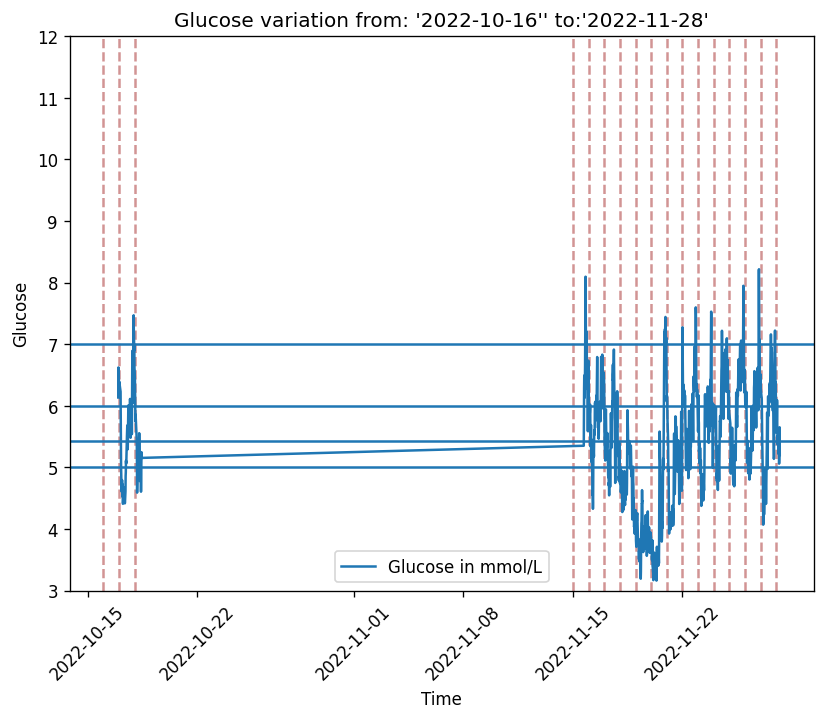

In [12]:
gl.plot_glucose(glucose)

As you can see the dates here are scattered. To deal with this you can choose the exact times in glyco using `from_time` and/or `to_time`.
This can either be a of the types: `str`, `pd.Timestamp`, or `date`.

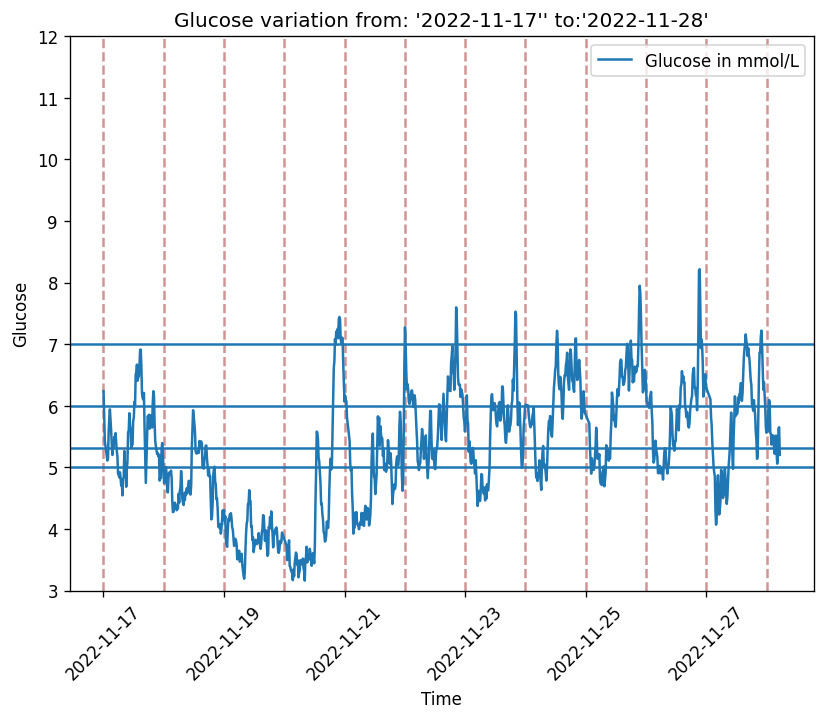

In [16]:
gl.plot_glucose(glucose, from_time='2022-11-17')

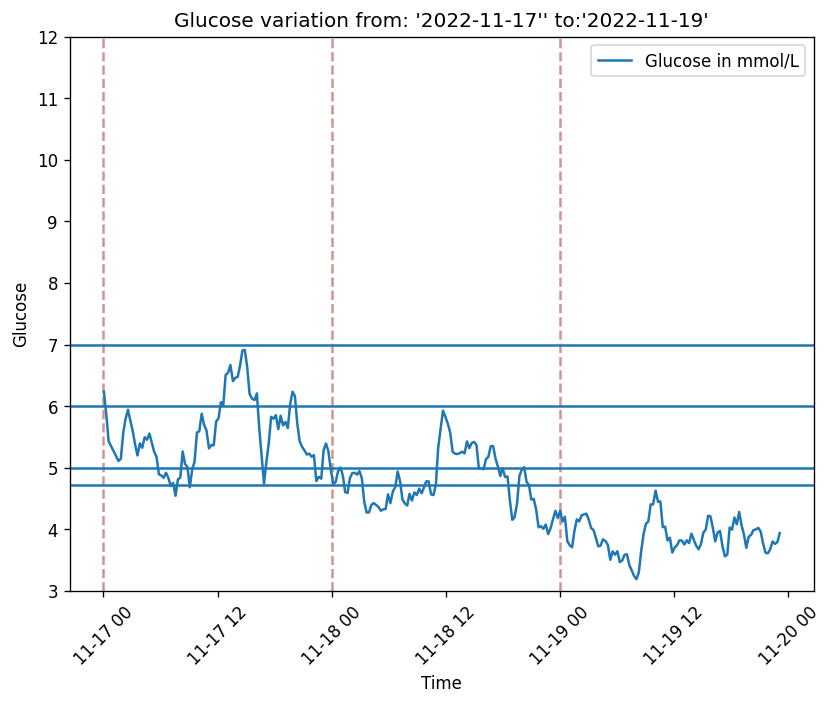

In [18]:
gl.plot_glucose(glucose, from_time='2022-11-17', to_time='2022-11-19')

## Plotting trend by day or week

To plot the daily trend, we can use the `plot_trend_by_hour` method out of the box

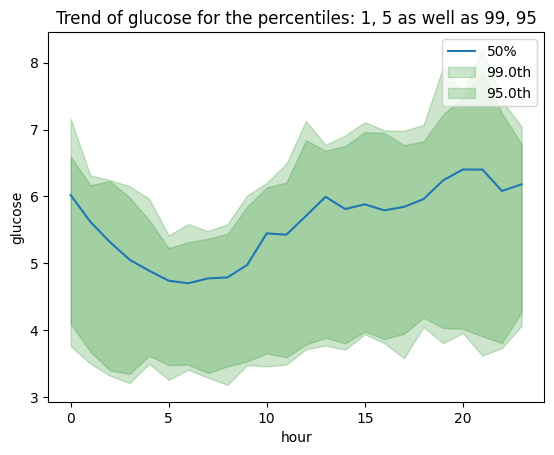

In [23]:
from matplotlib import pyplot as plt
gl.plot_trend_by_hour(glucose)
# we can choose to show the legend
plt.legend()
plt.show()

This automatically generates the general trend during one day on a per hour basis. 
- The blue area represents the mean (50th percentile).
- The dark green area represents the 5th to 95th percentiles.
- The light green area represents the 1st to 99th percentiles.

Similarly, we can use the `plot_trend_by_weekday` function to plot the trend for each day of the week.

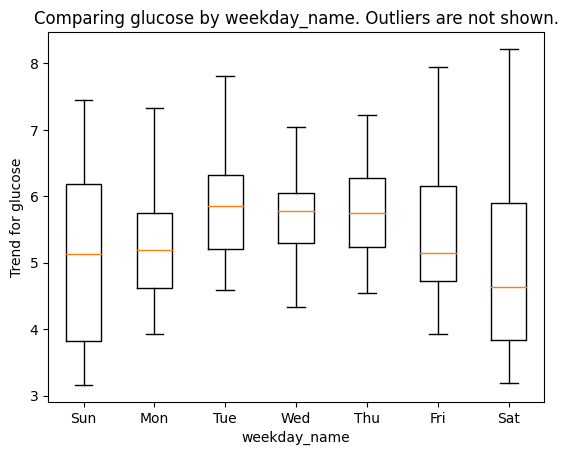

In [25]:
gl.plot_trend_by_weekday(glucose)

This automatically generates the general trend for each day of the week.

## How to include meals in the analysis?
To analyse meal data you can use meals from either:
* A csv file
* A meals dataframe
* If the data is from FreeStyle libre you can get it from the glucose dataframe.


To do so you must have the glucose dataframe already

In [26]:
import pandas as pd
from datetime import datetime

# Sample meal data
meal_data = [
    {"meal_datetime": "2022-11-14 08:00:00", "meal_notes": "BreakfastA"},
    {"meal_datetime": "2022-11-14 12:30:00", "meal_notes": "LunchA"},
    {"meal_datetime": "2022-11-14 18:45:00", "meal_notes": "DinnerA"},
    {"meal_datetime": "2022-11-15 07:30:00", "meal_notes": "BreakfastB"},
    {"meal_datetime": "2022-11-15 13:15:00", "meal_notes": "LunchB"},
    {"meal_datetime": "2022-11-15 19:00:00", "meal_notes": "DinnerB"},
    {"meal_datetime": "2022-11-16 08:15:00", "meal_notes": "BreakfastC"},
    {"meal_datetime": "2022-11-16 12:45:00", "meal_notes": "LunchC"},
    {"meal_datetime": "2022-11-16 18:30:00", "meal_notes": "DinnerC"},
    # Add more meal data for the desired date range...
]

# Create a DataFrame from the sample data
df = pd.DataFrame(meal_data)

# Convert the "meal_datetime" column to datetime objects
df["meal_datetime"] = pd.to_datetime(df["meal_datetime"])

# Filter the DataFrame for the specified date range
start_date = datetime(2022, 11, 14)
end_date = datetime(2022, 11, 20)
filtered_df = df[(df["meal_datetime"] >= start_date) & (df["meal_datetime"] <= end_date)]

# Define the CSV file name
csv_file_name = "data/out_meals.csv"

# Save the filtered DataFrame to a CSV file
filtered_df.to_csv(csv_file_name, index=False)

print(f"CSV file '{csv_file_name}' has been created with the filtered meal data.")


CSV file 'data/out_meals.csv' has been created with the filtered meal data.


In [44]:
meals = gl.read_events_csv('data/out_meals.csv', tsp_col='meal_datetime', ref_col='meal_notes', timestamp_fmt='%Y-%m-%d %H:%M:%S')

In [45]:
meals.head(5)

,meal_datetime,meal_notes,tsp,date,date_str,hour,weekday_number,weekday_name,is_weekend,event_reference,event_notes
0,2022-11-17 08:00:00,BreakfastA,2022-11-17 08:00:00,2022-11-17,2022-11-17,8,3,Thu,False,BreakfastA,BreakfastA
1,2022-11-17 12:30:00,LunchA,2022-11-17 12:30:00,2022-11-17,2022-11-17,12,3,Thu,False,LunchA,LunchA
2,2022-11-17 18:45:00,DinnerA,2022-11-17 18:45:00,2022-11-17,2022-11-17,18,3,Thu,False,DinnerA,DinnerA
3,2022-11-18 07:30:00,BreakfastB,2022-11-18 07:30:00,2022-11-18,2022-11-18,7,4,Fri,False,BreakfastB,BreakfastB
4,2022-11-18 13:15:00,LunchB,2022-11-18 13:15:00,2022-11-18,2022-11-18,13,4,Fri,False,LunchB,LunchB


In [46]:
meal_sessions = gl.get_event_sessions(meals, glucose, event_tsp='tsp')

In [47]:
meal_sessions.head(5)

,meal_datetime,meal_notes,tsp,date,date_str,hour,weekday_number,weekday_name,is_weekend,event_reference,...,dt_next_event,dt_prev_event,is_session_first,is_session_last,session_first,session_last,session_id,estimated_start,estimated_end,estimated_len
tsp,,,,,,,,,,,,,,,,,,,,,
2022-11-17 08:00:00,2022-11-17 08:00:00,BreakfastA,2022-11-17 08:00:00,2022-11-17,2022-11-17,8,3,Thu,False,BreakfastA,...,NaN,16200.0,True,True,2022-11-17 08:00:00,2022-11-17 08:00:00,1,2022-11-17 07:50:00,2022-11-17 10:05:00,8100.0
2022-11-17 12:30:00,2022-11-17 12:30:00,LunchA,2022-11-17 12:30:00,2022-11-17,2022-11-17,12,3,Thu,False,LunchA,...,16200.0,22500.0,True,True,2022-11-17 12:30:00,2022-11-17 12:30:00,2,2022-11-17 12:21:00,2022-11-17 14:37:00,8160.0
2022-11-17 18:45:00,2022-11-17 18:45:00,DinnerA,2022-11-17 18:45:00,2022-11-17,2022-11-17,18,3,Thu,False,DinnerA,...,22500.0,45900.0,True,True,2022-11-17 18:45:00,2022-11-17 18:45:00,3,2022-11-17 18:38:00,2022-11-17 20:53:00,8100.0
2022-11-18 07:30:00,2022-11-18 07:30:00,BreakfastB,2022-11-18 07:30:00,2022-11-18,2022-11-18,7,4,Fri,False,BreakfastB,...,45900.0,20700.0,True,True,2022-11-18 07:30:00,2022-11-18 07:30:00,4,2022-11-18 07:26:00,2022-11-18 09:27:00,7260.0
2022-11-18 13:15:00,2022-11-18 13:15:00,LunchB,2022-11-18 13:15:00,2022-11-18,2022-11-18,13,4,Fri,False,LunchB,...,20700.0,20700.0,True,True,2022-11-18 13:15:00,2022-11-18 13:15:00,5,2022-11-18 13:12:00,2022-11-18 15:13:00,7260.0


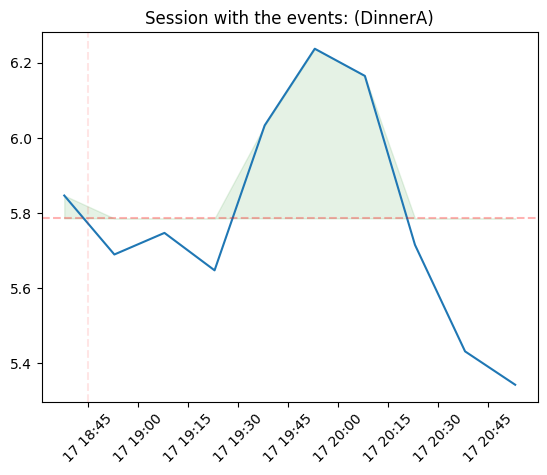

In [52]:
gl.plot_session_response(glucose, meal_sessions, session_id=3, use_notes_as_title=True, show_auc=True, notes_col='meal_notes')